<a href="https://colab.research.google.com/github/thiagobcoelho25/Panorama_COVID_19/blob/main/Thiago_Ribeiro_Panorama_do_COVID_19_no_Brasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  

# Panorama do COVID-19 no Brasil

COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<center><img alt="Colaboratory logo" width="50%" src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/covid19.jpg"></center>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

O *dataset* utilizado para esse trabalho foi obtido através da entidade sem fins lucrativos *Our World in Data*. Tem como objetivo agrupar dados de diferentes fontes para estudo e analise.

O dataset em questão possui dados relacionados as seguintes informações:

* Vacinação
* Casos confirmados
* Mortes confirmadas
* Hospitalizações e entradas na UTI
* Testes entre outros

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [ ]:
# instalando biblioteca para trabalhar com mapas
!pip install geopandas
import geopandas as gpd

In [ ]:
# instalando a biblioteca bar_chart_race
!pip install bar_chart_race -q
import bar_chart_race as bcr

### Dicionário de Variáveis

| Variável                         | Descrição                                                           |
|:---------------------------------|:----------------------------------------------------------------------|
| `iso_code`|ISO 3166-1 alpha-3 – Código de 3 letras dos países|
| `continent`|Continente da localização geográfica|
| `location`|Localização geográfica|
| `date`|Data da observação|
| `total_cases`|Total casos confirmados de COVID-19|
| `new_cases`|Casos novos confirmados de COVID-19|
| `new_cases_smoothed`|Casos novos confirmados de COVID-19 (suavizado - 7 dias)|
| `total_deaths`|Total de mortes atribuídas à COVID-19|
| `new_deaths`|Novas mortes atribuídas à COVID-19|
| `new_deaths_smoothed`|Novas mortes atribuídas à COVID-19 (suavizado - 7 dias)|
| `total_cases_per_million`|Total de casos confirmados de COVID-19 por 1 milhão de pessoas|
| `new_cases_per_million`|Novos casos confirmados de COVID-19 por 1 milhão de pessoas|
| `new_cases_smoothed_per_million`|Novos casos confirmados de COVID-19 (suavizado - 7 dias) por 1 milhão de pessoas|
| `total_deaths_per_million`|Total de mortes atribuídas à COVID-19 por 1 milhão de pessoas|
| `new_deaths_per_million`|Novas mortes atribuídas à COVID-19 por 1 milhão de pessoas|
| `new_deaths_smoothed_per_million`|Novas mortes atribuídas à COVID-19 (suavizado - 7 dias) por 1 milhão de pessoas|
| `reproduction_rate`|Estimativa em tempo real da taxa de reprodução efetiva da COVID-19|
| `icu_patients`|Número de pacientes da COVID-19 em UTIs em dia determinado|
| `icu_patients_per_million`|Número de pacientes da COVID-19 em UTIs em dia determinado por 1 milhão de pessoas|
| `hosp_patients`|Número de pacientes da COVID-19 em hospital em um dia determinado|
| `hosp_patients_per_million`|Número de pacientes da COVID-19 em hospital em um dia determinado por 1 milhão de pessoas|
| `weekly_icu_admissions`|Número de pacientes da COVID-19 recém internados em UTIs em uma determinada semana|
| `weekly_icu_admissions_per_million`|Número de pacientes da COVID-19 recém internados em UTIs em uma determinada semana por 1 milhão de pessoas|
| `weekly_hosp_admissions`|Número de pacientes da COVID-19 recém internados em hospitais em uma determinada semana|
| `weekly_hosp_admissions_per_million`|Número de pacientes da COVID-19 recém internados em hospitais em uma determinada semana por 1 milhão de pessoas|
| `total_tests`|Total de testes para COVID-19
| `new_tests`|Novos testes para COVID-19 (calculado apenas para dias consecutivos)|
| `total_tests_per_thousand`|Total de testes para COVID-19 por 1000 pessoas|
| `new_tests_per_thousand`|Novos testes para COVID-19 por 1000 pessoas|
| `new_tests_smoothed`|Novos testes para COVID-19 (suavizado - 7 dias). Para países que não relatam dados de teste diariamente, assume-se que os testes mudaram igualmente em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são então calculados em uma janela contínua de 7 dias| 
| `new_tests_smoothed_per_thousand`|Novos testes para COVID-19 (suavizado - 7 dias) por 1000 pessoas
| `positive_rate`|Parcela de testes COVID-19 positivos, dada como uma média contínua de 7 dias (este é o inverso de tests_per_case)|
| `tests_per_case`|Testes realizados por novos casos confirmados de COVID-19, dados como uma média contínua de 7 dias (este é o inverso de positive_rate)|
| `tests_units`|Unidades usadas pelo local para relatar seus dados de teste|
| `total_vaccinations`|Número total de doses de vacina contra COVID-19 aplicadas|
| `people_vaccinated`|Número total de pessoas que receberam ao menos uma dose da vacina|
| `people_fully_vaccinated`|Número total de pessoas que receberam todas as doses indicadas pelo protocolo de vacinação|
| `total_boosters`|Número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação)|
| `new_vaccinations`|Número total de doses de vacina contra COVID-19 aplicadas (calculado apenas para dias consecutivos)|
| `new_vaccinations_smoothed`|Novas doses de vacina contra COVID-19 aplicadas (suavizado - 7 dias). Para países que não relatam dados de vacinação diariamente, assumimos que a vacinação mudou igualmente diariamente em todos os períodos em que nenhum dado foi relatado. Isso produz uma série completa de números diários, que são então calculados em uma janela contínua de 7 dias|
| `total_vaccinations_per_hundred`|Número total de doses de vacina contra COVID-19 aplicadas por 100 habitantes na população total|
| `people_vaccinated_per_hundred`|Número total de pessoas que receberam ao menos uma dose da vacina por 100 habitantes na população total|
| `people_fully_vaccinated_per_hundred`|Número total de pessoas que receberam todas as doses indicadas pelo protocolo de vacinação por 100 habitantes na população total|
| `total_boosters_per_hundred`|Número total de doses de reforço de vacinação COVID-19 administradas (doses administradas além do número prescrito pelo protocolo de vacinação) por 100 habitantes na população total|
| `new_vaccinations_smoothed_per_million`|Novas doses de vacina contra COVID-19 aplicadas (suavizado - 7 dias) por 1 milhão de pessoas na população total|
| `new_people_vaccinated_smoothed`|Número diário de pessoas que receberam a primeira dose da vacina (suavizado - 7 dias)|
| `new_people_vaccinated_smoothed_per_hundred`|Número diário de pessoas que receberam a primeira dose da vacina (suavizado - 7 dias) por 100 habitantes na população total|
| `stringency_index`|Índice de Rigidez de Resposta do Governo: medida composta com base em 9 indicadores de resposta, incluindo fechamento de escolas, fechamento de locais de trabalho e proibição de viagens, reescalonado para um valor de 0 a 100 (em que 100 é a resposta mais rigorosa)|
| `population`|População (valores mais recentes disponíveis)|
| `population_density`|Número de pessoas dividido por área de terra, medido em quilômetros quadrados. Ano mais recente disponível|
| `median_age`|Idade média da população. Projeção da ONU para 2020|
| `aged_65_older`|Parcela da população com 65 anos ou mais. Ano mais recente disponível|
| `aged_70_older`|Parcela da população com 70 anos ou mais em 2015|
| `gdp_per_capita`|Produto interno bruto em paridade de poder de compra (dólares internacionais constantes de 2011). Ano mais recente disponível|
| `extreme_poverty`|Percentual da população que vive em extrema pobreza. Ano mais recente disponível desde 2010|
| `cardiovasc_death_rate`|Taxa de mortalidade por doença cardiovascular em 2017 (número anual de mortes por 100.000 pessoas)|
| `diabetes_prevalence`|Prevalência de diabetes (\% da população de 20 a 79 anos) em 2017|
| `female_smokers`|Proporção de mulheres que fumam. Ano mais recente disponível|
| `male_smokers`|Proporção de homens que fumam. Ano mais recente disponível|
| `handwashing_facilities`|Percentagem da população com instalações básicas de lavagem das mãos nas instalações. Ano mais recente disponível|
| `hospital_beds_per_thousand`|Leitos hospitalares para 1000 pessoas. Último ano disponível desde 2010|
| `life_expectancy`|Expectativa de vida ao nascer em 2019|
| `human_development_index`|Um índice composto que mede o desempenho médio em três dimensões básicas do desenvolvimento humano – uma vida longa e saudável, conhecimento e um padrão de vida decente. Valores para 2019|
| `excess_mortality`|Diferença percentual entre o número relatado de mortes semanais ou mensais em 2020–2021 e o número projetado de mortes para o mesmo período com base em anos anteriores|
|`excess_mortality_cumulative`|Diferença percentual entre o número acumulado de mortes desde 1º de janeiro de 2020 e as mortes cumulativas projetadas para o mesmo período com base em anos anteriores|
|`excess_mortality_cumulative_absolute`|Diferença cumulativa entre o número relatado de óbitos desde 1º de janeiro de 2020 e o número projetado de óbitos para o mesmo período com base em anos anteriores|
|`excess_mortality_cumulative_per_million`|Diferença cumulativa entre o número relatado de mortes desde 1º de janeiro de 2020 e o número projetado de mortes para o mesmo período com base em anos anteriores, por milhão de pessoas.|

## Análise Exploratória dos Dados
Na nossa análise exploratória de dados da COVID-19 iremos tentar entender como varios países no mundo estão lidando com a covid, com a criação de graficos referentes a vacinação, casos confirmados, mortes etc. Também faremos uma análise mais aprofundada para o Brasil.

### Análise Exploratória Inicial

Visualização das 5 primeiras entradas:

In [ ]:
df.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Tamanho do dataframe:

In [ ]:
df.shape
print(f'O dataframe possui {df.shape[0]} entradas, com respectivamente {df.shape[1]} colunas')

O dataframe possui 166789 entradas, com respectivamente 67 colunas


Nomes das colunas encontradas no dataframe e seus tipos de dados:

In [ ]:
# colunas que compoe o dataframe
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [ ]:
# tipos das colunas
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

iso_code                                       object
continent                                      object
location                                       object
date                                           object
total_cases                                   float64
new_cases                                     float64
new_cases_smoothed                            float64
total_deaths                                  float64
new_deaths                                    float64
new_deaths_smoothed                           float64
total_cases_per_million                       float64
new_cases_per_million                         float64
new_cases_smoothed_per_million                float64
total_deaths_per_million                      float64
new_deaths_per_million                        float64
new_deaths_smoothed_per_million               float64
reproduction_rate                             float64
icu_patients                                  float64
icu_patients_per_million    

Identificação das porcentagens de valores ausentes das colunas:

In [ ]:
# porcentagem dos valores ausentes
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print((df.isnull().sum() / df.shape[0]).sort_values(ascending=False))

weekly_icu_admissions_per_million             0.967252
weekly_icu_admissions                         0.967252
excess_mortality_cumulative_per_million       0.965849
excess_mortality                              0.965849
excess_mortality_cumulative                   0.965849
excess_mortality_cumulative_absolute          0.965849
weekly_hosp_admissions_per_million            0.934372
weekly_hosp_admissions                        0.934372
total_boosters                                0.893668
total_boosters_per_hundred                    0.893668
icu_patients_per_million                      0.859013
icu_patients                                  0.859013
hosp_patients                                 0.852119
hosp_patients_per_million                     0.852119
new_vaccinations                              0.774350
people_fully_vaccinated                       0.757190
people_fully_vaccinated_per_hundred           0.757190
people_vaccinated                             0.740816
people_vac

Estatística da colunas:

In [ ]:
# estatística descritiva das colunas
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.637490e+05,1.636090e+05,1.616250e+05,1.458890e+05,145936.000000,143838.000000,162989.000000,162849.000000,160871.000000,145142.000000,...,106342.000000,104883.000000,68759.000000,124004.000000,155698.000000,136631.000000,5.696000e+03,5696.000000,5696.000000,5696.000000
mean,2.552188e+06,1.160895e+04,1.161472e+04,5.783416e+04,170.978751,172.593306,29699.304718,167.661325,166.616877,511.231201,...,10.627070,32.778506,50.787279,3.027742,73.576066,0.725578,3.761302e+04,9.404336,15.967077,972.197816
std,1.555033e+07,8.457752e+04,8.281271e+04,3.029782e+05,831.636513,816.612569,52449.395497,712.136441,536.112898,786.770125,...,10.558093,13.523948,31.811550,2.450035,7.491502,0.149963,1.043065e+05,16.439173,30.092830,1420.342295
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.017000e+03,1.000000e+00,7.000000e+00,7.900000e+01,0.000000,0.143000,626.131000,0.041000,1.630000,18.625750,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.515000e+01,-0.722500,-0.752500,-29.788442
50%,2.626000e+04,7.900000e+01,1.072860e+02,7.850000e+02,2.000000,2.429000,4769.698000,11.432000,18.890000,128.689000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.424600e+03,6.065000,7.195000,473.393182
75%,3.006610e+05,1.065000e+03,1.150571e+03,7.324000e+03,20.000000,21.286000,38057.766000,101.386000,121.408000,715.999750,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.478462e+04,14.520000,22.997500,1656.361067
max,4.478822e+08,4.206334e+06,3.444237e+06,6.007317e+06,18020.000000,14689.143000,706541.904000,77691.083000,16052.608000,6329.697000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.930000,9153.060433


Para valores nulos em `new_cases`, como no caso do Brasil, onde há alteração no numero total de casos (`total_cases`), particularmente entrei em contato com a *Our World in Data* e obtive a seguinte resposta.

>Dear Thiago
>
>Thanks for getting in touch. The right data to use is the one in the "totals" column: that's the data directly imported from Johns Hopkins University and left "untouched". In very rare cases, we set the "new" columns to blank when a big data correction was made by the national government, therefore creating a sudden increase and decrease that doesn't truly represent something that happened on that day.
Specifically for Brazil, cases on 2021-09-18 increased significantly, due to the addition of many previously-unreported cases.

Algumas vezes essas colunas são deixadas em branco quando a uma grande correção de dados feita pelo governo nacional, criando assim um aumento ou uma diminuição repentinas que não representam realmente algo que aconteceu naquele dia. Especificamente para o Brasil, os casos em 18/09/2021 aumentaram significativamente, devido à adição de muitos casos não relatados anteriormente.

podemos ver que a quantidade de `new_cases` se encontra como NaN, mas há uma variação para baixo na quantidade total de casos, na coluna `total_cases`

In [ ]:
# retorna o 'row' onde a coluna 'new_cases' == null e 'location' == Brazil
brazil_new_cases_equal_null = df[(df.new_cases.isnull()) & (df.location == 'Brazil')].index
brazil_new_cases_equal_null  = brazil_new_cases_equal_null[0]
df.iloc[[brazil_new_cases_equal_null-1,brazil_new_cases_equal_null,brazil_new_cases_equal_null+1]][['iso_code','location','date','new_cases','total_cases']]

,iso_code,location,date,new_cases,total_cases
21482,BRA,Brazil,2020-06-20,63523.0,1106332.0
21483,BRA,Brazil,2020-06-21,NaN,1086536.0
21484,BRA,Brazil,2020-06-22,28192.0,1114728.0


Com um agrande quantidade de dados ausentes, optei por retirar algumas colunas que, ao primeiro momento e ao escopo desse trabalho não interessavam à análise. Irei fazer essa operação no caso especifico do estudo do Brasil.

Transformação da coluna `date` para o formato `datetime`

In [ ]:
# transformando a coluna para date
df.date = pd.to_datetime(df.date)

Filtrando-se pela data mais atual, no caso da criação do notebook dia 07 de Março de 2022, encontramos 'location' com valores que aparentemente não corespondem a um país em especifico, mas de regras de agragação do dataset. Um exemplo pode ser observado com o exemplo `OWID_EUR` e `OWID_ASI` que represetam o total de casos para o continente europeu e asiatico respectivamente.

In [ ]:
df[df['date'] == '2022-03-07'].sort_values(by="total_cases", ascending=False).head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
164653,OWID_WRL,NaN,World,2022-03-07,447882185.0,1602057.0,1555776.286,6007317.0,7919.0,7240.714,...,6.434,34.635,60.13,2.705,72.58,0.737,NaN,NaN,NaN,NaN
66898,OWID_HIC,NaN,High income,2022-03-07,241839742.0,1087422.0,1051275.857,2228604.0,4175.0,3745.429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50237,OWID_EUR,NaN,Europe,2022-03-07,162360526.0,713649.0,667896.286,1728863.0,2484.0,2490.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8931,OWID_ASI,NaN,Asia,2022-03-07,121984374.0,581890.0,682025.429,1367047.0,1757.0,1912.143,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159210,OWID_UMC,NaN,Upper middle income,2022-03-07,120512494.0,324002.0,288506.143,2453099.0,2002.0,2392.714,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nesse caso, para encontrarmos os 5 paises com mais casos precisamos filtrar o dataset, retirando as entradas que possuem o `iso_code` contendo a palavra "OWID".

In [ ]:
# 5 paises com mais casos, retirando as agregações de `iso_code` contendo a string "OWID"
df_most_cases = df[df['date'] == '2022-03-07'].sort_values(by="total_cases", ascending=False)
df_most_cases_without_owid = df_most_cases[~df_most_cases['iso_code'].str.contains("OWID")]
df_most_cases_without_owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
159086,USA,North America,United States,2022-03-07,79339388.0,63110.0,41716.714,960505.0,1686.0,1341.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
70927,IND,Asia,India,2022-03-07,42971308.0,3993.0,5751.857,515210.0,108.0,169.571,...,1.9,20.6,59.55,0.53,69.66,0.645,NaN,NaN,NaN,NaN
22194,BRA,South America,Brazil,2022-03-07,29077831.0,21306.0,40180.000,652648.0,210.0,424.571,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
54982,FRA,Europe,France,2022-03-07,23124590.0,14496.0,52723.429,139520.0,176.0,154.857,...,30.1,35.6,NaN,5.98,82.66,0.901,NaN,NaN,NaN,NaN
158307,GBR,Europe,United Kingdom,2022-03-07,19298531.0,126436.0,51635.143,162292.0,140.0,112.571,...,20.0,24.7,NaN,2.54,81.32,0.932,NaN,NaN,NaN,NaN


Faremos o mesmo para as mortes e em seguida plotaremos os graficos dos 2:

In [ ]:
# 5 paises com mais mortes, retirando as agregações de `iso_code` contendo a string "OWID"
df_most_deaths = df[df['date'] == '2022-03-07'].sort_values(by="total_deaths", ascending=False)
df_most_deaths_without_owid = df_most_deaths[~df_most_deaths['iso_code'].str.contains("OWID")]
df_most_deaths_without_owid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
159086,USA,North America,United States,2022-03-07,79339388.0,63110.0,41716.714,960505.0,1686.0,1341.571,...,19.1,24.6,NaN,2.77,78.86,0.926,NaN,NaN,NaN,NaN
22194,BRA,South America,Brazil,2022-03-07,29077831.0,21306.0,40180.000,652648.0,210.0,424.571,...,10.1,17.9,NaN,2.20,75.88,0.765,NaN,NaN,NaN,NaN
70927,IND,Asia,India,2022-03-07,42971308.0,3993.0,5751.857,515210.0,108.0,169.571,...,1.9,20.6,59.550,0.53,69.66,0.645,NaN,NaN,NaN,NaN
125379,RUS,Europe,Russia,2022-03-07,16770275.0,72136.0,86954.143,349853.0,657.0,742.571,...,23.4,58.3,NaN,8.05,72.58,0.824,NaN,NaN,NaN,NaN
99480,MEX,North America,Mexico,2022-03-07,5566669.0,1684.0,8291.429,319901.0,42.0,250.286,...,6.9,21.4,87.847,1.38,75.05,0.779,NaN,NaN,NaN,NaN


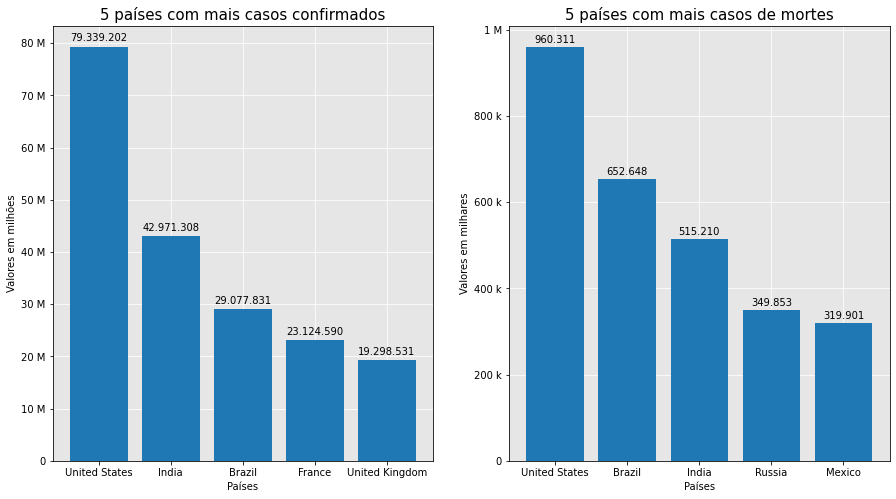

In [ ]:
# plot dos graficos de casos e mortes dos 5 primeiros paises:
from matplotlib.ticker import EngFormatter

fig, (ax_casos, ax_mortes) = plt.subplots(1, 2, figsize=(15,8));
bar_container = ax_casos.bar(x=df_most_cases_without_owid.iloc[:5]['location'], height=df_most_cases_without_owid.iloc[:5]['total_cases']);
ax_casos.yaxis.get_major_formatter().set_scientific(False)
formatter0 = EngFormatter()
ax_casos.yaxis.set_major_formatter(formatter0)
ax_casos.set_xlabel('Países');
ax_casos.set_ylabel('Valores em milhões');
ax_casos.set_title('5 países com mais casos confirmados', fontsize=15);
ax_casos.set_axisbelow(True)
ax_casos.set_facecolor('#E6E6E6')
ax_casos.grid(color='w', linestyle='solid')
for retangulo in ax_casos.patches:
  ax_casos.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 1090800,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=10, color='black')

ax_mortes.bar(x=df_most_deaths_without_owid.iloc[:5]['location'], height=df_most_deaths_without_owid.iloc[:5]['total_deaths'])
ax_mortes.yaxis.get_major_formatter().set_scientific(False)
ax_mortes.yaxis.set_major_formatter(formatter0)
ax_mortes.set_xlabel('Países');
ax_mortes.set_ylabel('Valores em milhares');
ax_mortes.set_title('5 países com mais casos de mortes', fontsize=15);
ax_mortes.set_axisbelow(True)
ax_mortes.set_facecolor('#E6E6E6')
ax_mortes.grid(color='w', linestyle='solid')
for retangulo in ax_mortes.patches:
  ax_mortes.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 10000,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=10, color='black')

Vamos plotar um 'choropleth map', ou um mapa-mundi colorido, onde países com mais casos de COVID-19 tem uma coloração mais intensa. A criação do plot do mapa-mundi foi um desafio a parte para mim, já que há uma diferença relativa ao que é considerado um país para o Our World in Data. Tentei dessa forma utilizar um dataset/shapefile em que houvesse uma diferença mínima entre eles. Mais adiante irei explicar todo o processo de tratamento e 'plotagem' desse mapa.

In [ ]:
# gpd.datasets.get_path('naturalearth_lowres') tem apenas 177 países
import os

dirname = os.path.abspath('')
#filename = os.path.join(dirname, "IPUMSI_world_release2020\world_countries_2020.shp")
filename = os.path.join(dirname, "TM_WORLD_BORDERS-0.3.shp")
world = gpd.read_file(filename)

Utilizei do geopandas para trabalhar com dados geoespaciais. Dentro de sua biblioteca existe um exemplo de mapa-mundi com a divisão dos países, entretanto um pouco desatualizada. Nesse sentido optei por utilizar os dados do site http://thematicmapping.org/downloads/world_borders.php , onde consegui uma melhor aproximação com a quantidade de países do dataset de COVID e suas bordas geográfica.

In [ ]:
# agrupamento dos dados de COVID-19 por 'iso_code' e 'location' 
df_groupby_most_cases_by_iso = df_most_cases_without_owid.groupby(by=['iso_code','location'])['total_cases'].max().reset_index()
print("Dataset GroupBy: ",df_groupby_most_cases_by_iso.shape)
print("World Map: ", world.shape)

Dataset GroupBy:  (215, 3)
World Map:  (246, 12)


Percebemos que existe uma diferença de 29 países entre os dados do dataset de COVID-19 e de bordas geográficas de países no mundo. Antes de tudo vamos observar como o dataset do com os dados geofráficos esta organizado

In [ ]:
world.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ..."
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ..."
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39..."
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000..."
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40..."


Vemos que nosso dataset de dados geográficos possui isos 2 e 3, nome e principalmente o tipo 'geometry', que representa o desenho geometrico do país em questão. Vamos então ver quais são os países que nosso dataset de covid e o geográfico tem de incomum

In [ ]:
# países que o dataset de COVID-19 possue, mas não existe correspondente no geográfico:
df_merged = df_groupby_most_cases_by_iso[~df_groupby_most_cases_by_iso['iso_code'].isin(world['ISO3'])].reset_index(drop=True)
df_merged

,iso_code,location,total_cases
0,BES,Bonaire Sint Eustatius and Saba,7622.0
1,CUW,Curacao,39133.0
2,SSD,South Sudan,17015.0


In [ ]:
# países que o dataset geográfico possue, mas não existe correspondente no de COVID-19:
df_inverse_merged = world[~world['ISO3'].isin(df_groupby_most_cases_by_iso['iso_code'])].reset_index(drop=True)
df_inverse_merged

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry
0,AQ,AS,ASM,16,American Samoa,20,64051,9,61,-170.730,-14.318,"MULTIPOLYGON (((-170.54251 -14.29750, -170.546..."
1,FG,GF,GUF,254,French Guiana,8815,192099,19,5,-53.241,3.924,"POLYGON ((-53.49434 5.57234, -53.48361 5.56806..."
2,GQ,GU,GUM,316,Guam,55,16857,9,57,144.707,13.385,"POLYGON ((144.70941 13.23500, 144.70245 13.235..."
3,KN,KP,PRK,408,"Korea, Democratic People's Republic of",12041,23615611,142,30,126.451,39.778,"MULTIPOLYGON (((124.84610 39.49722, 124.83998 ..."
4,MB,MQ,MTQ,474,Martinique,106,395896,19,29,-61.021,14.653,"POLYGON ((-60.86084 14.40278, -60.88695 14.465..."
5,NE,NU,NIU,570,Niue,26,1632,9,61,-169.869,-19.052,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."
6,CQ,MP,MNP,580,Northern Mariana Islands,0,80258,9,57,145.623,15.005,"MULTIPOLYGON (((145.28165 14.15833, 145.20636 ..."
7,MF,YT,MYT,175,Mayotte,0,0,2,14,45.155,-12.777,"MULTIPOLYGON (((45.28249 -12.80417, 45.27777 -..."
8,None,AX,ALA,248,Åland Islands,0,0,150,154,19.952,60.198,"MULTIPOLYGON (((20.21083 59.98000, 20.20333 59..."
9,NF,NF,NFK,574,Norfolk Island,0,0,9,53,167.953,-29.037,"POLYGON ((167.96497 -29.08111, 167.92358 -29.0..."


Observando a diferença entre os "países", podemos ver diferenças geopoliticas entre os datasets. O caso da Coreia do Norte e do Turcomenistão podem ser explicados de maneira simples pela falta de dados fornecidos pelos governos daqueles países, não apresentando entradas no dataset de COVID-19, exemplo na reportagem da bbc: https://www.bbc.com/news/world-asia-58583212.

Outro caso é o do Sudão do Sul (South Sudan), ganhando independência do Sudão em 2011 e tornando-se estado/país soberano mais recente com amplo reconhecimento a partir de 2022, segundo https://www.worldatlas.com/articles/which-are-the-youngest-countries-of-the-world.html

Já Saara Ocidental (Western Sahara) é considerado um territorio em disputa, entre a República Árabe Saaraui Democrática (RASD) e o Marrocos. Internacionalmente, a maioria dos países assumiu uma posição geralmente ambígua e neutra nas reivindicações de cada lado e pressionam ambas as partes a chegarem a um acordo sobre uma resolução pacífica

Vamos juntar os dataframes pelos isos dos países de cada um, como um JOIN em SQL. Nesse caso queremos todas as entradas do dataset geográfico com relação ao dataset de COVID-19, mesmo que as não existam dados.

In [ ]:
# merge entre os dataset, utilizando o 'ISO3' com 'iso_code' e modo LEFT.
# OBS: poderiamos utilizar OUTER, mas ficariamos com entradas com 'total_cases', mas sem o atributo 'geometry'.
df_world_merged = world.merge(df_groupby_most_cases_by_iso, left_on='ISO3', right_on='iso_code', how="left")

# removendo Antartica
df_world_merged = df_world_merged[df_world_merged['ISO3'] != 'ATA']

In [ ]:
df_world_merged.shape

(245, 15)

Podemos observar que a junção ocorreu entre a `ISO3` do dataset geográfico com a `iso_code` do dataset de COVID-19.

In [ ]:
df_world_merged.head()

,FIPS,ISO2,ISO3,UN,NAME,AREA,POP2005,REGION,SUBREGION,LON,LAT,geometry,iso_code,location,total_cases
0,AC,AG,ATG,28,Antigua and Barbuda,44,83039,19,29,-61.783,17.078,"MULTIPOLYGON (((-61.68667 17.02444, -61.73806 ...",ATG,Antigua and Barbuda,7455.0
1,AG,DZ,DZA,12,Algeria,238174,32854159,2,15,2.632,28.163,"POLYGON ((2.96361 36.80222, 2.98139 36.80694, ...",DZA,Algeria,265297.0
2,AJ,AZ,AZE,31,Azerbaijan,8260,8352021,142,145,47.395,40.430,"MULTIPOLYGON (((45.08332 39.76804, 45.26639 39...",AZE,Azerbaijan,789481.0
3,AL,AL,ALB,8,Albania,2740,3153731,150,39,20.068,41.143,"POLYGON ((19.43621 41.02107, 19.45055 41.06000...",ALB,Albania,272250.0
4,AM,AM,ARM,51,Armenia,2820,3017661,142,145,44.563,40.534,"MULTIPOLYGON (((45.57305 40.63249, 45.52888 40...",ARM,Armenia,421401.0


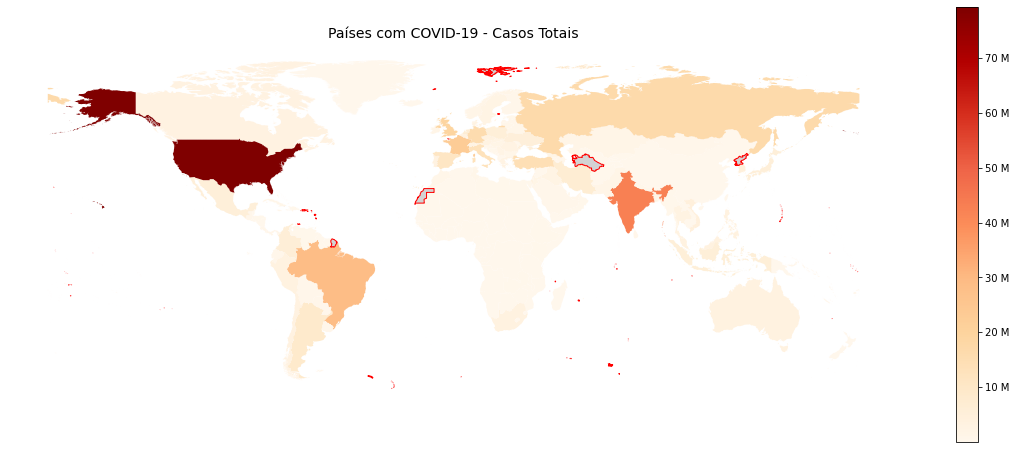

In [ ]:
# plotando o mapa-mundi com intensidade de coloração relacionado a quantidade total de casos de COVID-19.
# quanto mais vermelho, maior o numero de casos.  
ax_world_merged = df_world_merged.plot(column='total_cases', figsize=(20,10), 
                                       missing_kwds={"color": "lightgrey","edgecolor": "red",
                                                     "label": "Missing values",}, cmap='OrRd', legend=True,
                                       legend_kwds={'shrink': 0.8})
ax_world_merged.set_axis_off();
ax_world_merged.set_title('Países com COVID-19 - Casos Totais', fontsize=14);

# Get colourbar from second axis
colourbar = ax_world_merged.get_figure().get_axes()[1]

formatter0 = EngFormatter()
colourbar.yaxis.set_major_formatter(formatter0)

No grafico acima podemos ver os países ao redor do mundo coloridos pela quantidade de casos totais de COVID-19, quanto mais vermelho, maior o numero de casos naquele país. As áreas em cor cinza e rodeadas com borda vermelha, são países ou áreas administrativas que não possuem entradas com correlação ao dataset de COVID-19, potanto não possuem dados para análise.

Vamos plotar a linha de evolução dos casos confirmados nos 5 países que encontramos a maior quantidade de casos.

In [ ]:
# importar mdates para mostrar na legenda apenas o ano/mes em intervalos de 2
import matplotlib.dates as mdates

monthsFmt = mdates.DateFormatter("%Y - %m")

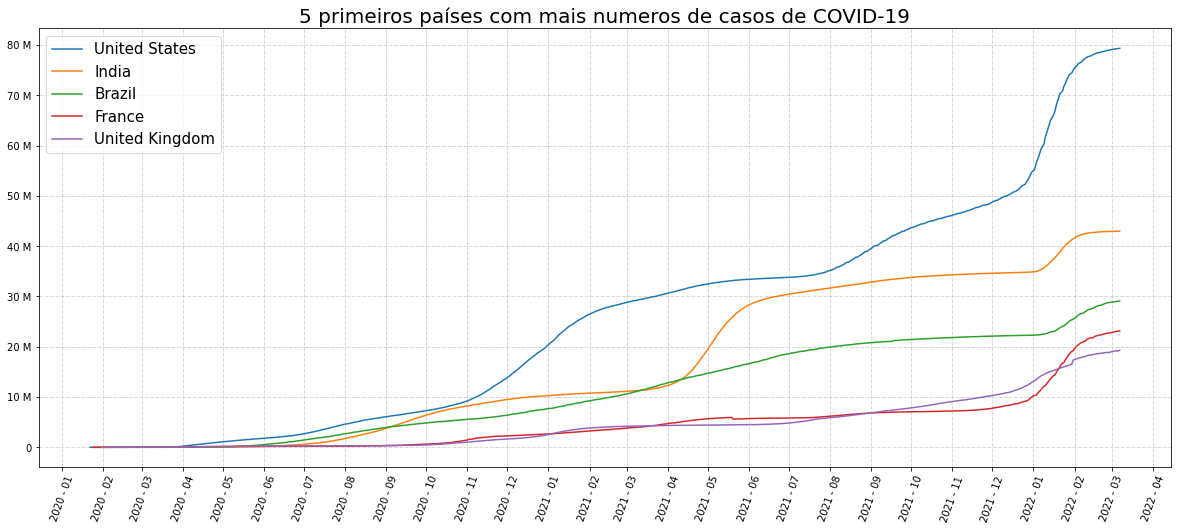

In [ ]:
array_most_cases_country = df_most_cases_without_owid.head()['location'].values

fig, ax = plt.subplots(figsize=(17, 8))
for country in array_most_cases_country:
  df_country = df[df['location'] == country]
  ax.plot(df_country['date'], df_country['total_cases'], label=country)
ax.yaxis.get_major_formatter().set_scientific(False)
formatter0 = EngFormatter()
ax.yaxis.set_major_formatter(formatter0)
ax.grid(linestyle = '-.', linewidth = 0.5);
ax.legend(fontsize=15);
ax.set_title("5 primeiros países com mais numeros de casos de COVID-19", fontsize=20);
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1));
ax.xaxis.set_major_formatter(monthsFmt);
plt.xticks(rotation=70);
plt.tight_layout(pad = 3.0);

Podemos plotar um grafico de linhas para ver a evolução do total de casos de COVID-19 no mundo.

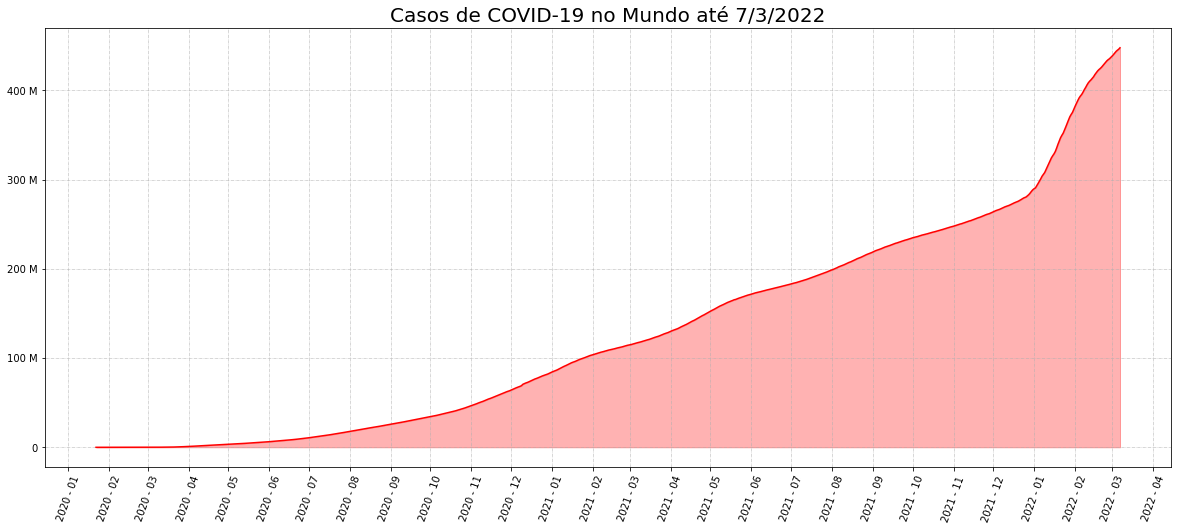

In [ ]:
fig, ax = plt.subplots(figsize=(17, 8))
last_date = df['date'].max()
ax.plot(df.loc[df.location == "World"].date, df.loc[df.location == "World"]['total_cases'], color='r')
ax.set_title(f"Casos de COVID-19 no Mundo até {last_date.day}/{last_date.month}/{last_date.year}", fontsize=20);
ax.grid(linestyle = '-.', linewidth = 0.5);
formatter0 = EngFormatter();
ax.yaxis.set_major_formatter(formatter0);
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1));
ax.xaxis.set_major_formatter(monthsFmt);
plt.xticks(rotation=70);
ax.fill_between(df.loc[df.location == "World"].date, df.loc[df.location == "World"]['total_cases'], alpha = 0.3, color = 'red')
plt.tight_layout(pad = 3.0);

Vamos verificar a relação entre a economia do país, coluna `gpd_per_capita`, com seu número de mortes.

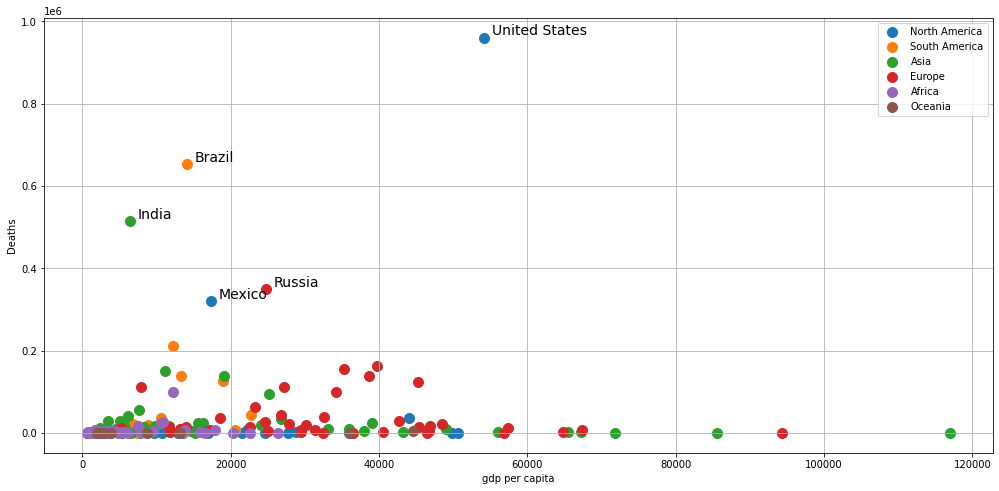

In [ ]:
fig, ax = plt.subplots(figsize=(17, 8))

array_continents = df_most_deaths_without_owid["continent"].unique()

for continent in array_continents:
  continent_x = df_most_deaths_without_owid[df_most_deaths_without_owid.continent == continent]["gdp_per_capita"]
  continent_y = df_most_deaths_without_owid[df_most_deaths_without_owid.continent == continent]["total_deaths"]
  ax.scatter(continent_x, continent_y, label=continent, s=100);

def apply_ax_notation(country_x, country_y, location):
  ax.annotate(size=14,xy=(country_x,country_y), xytext=(country_x+1000,country_y+6000), s=location)

[apply_ax_notation(x, y, location) for (x, y, location) in df_most_deaths_without_owid.iloc[:5][["gdp_per_capita", "total_deaths", 'location']].to_numpy()]


ax.set_xlabel('gdp per capita');
ax.set_ylabel('Deaths');


ax.grid();
ax.legend();

Conseguimos perceber que a COVID-19 não atingiu todos os países de forma semelhante, com paises de economia forte e com numeros de mortes altos e países pobres e com baixa mortalidade. 
Ainda assim, nesse grafico só estamos trabalhando com a relação de mortes absolutas x gdp per capita. Para análisarmos como essas mortes tiveram relação com o total das populações dos países, e consequentemente seus impactos, podemos plotar a relação quantidade de mortes por milhão x gpd per capita:


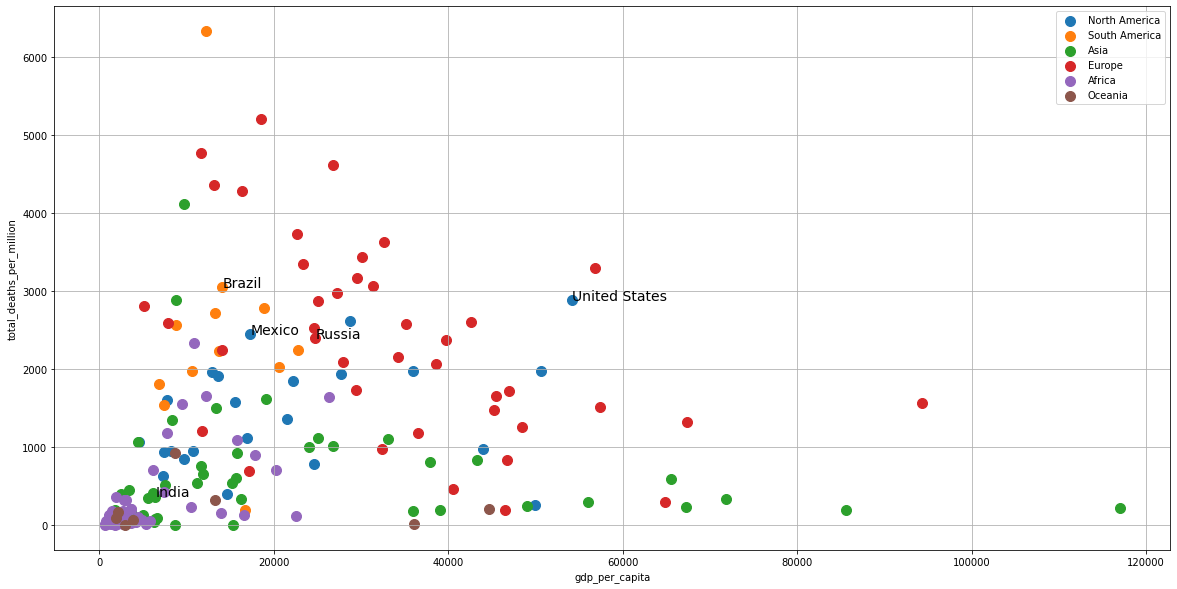

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))

array_continents = df_most_deaths_without_owid["continent"].unique()

for continent in array_continents:
  continent_x = df_most_deaths_without_owid[df_most_deaths_without_owid.continent == continent]["gdp_per_capita"]
  continent_y = df_most_deaths_without_owid[df_most_deaths_without_owid.continent == continent]["total_deaths_per_million"]
  ax.scatter(continent_x, continent_y, label=continent, s=100);

def apply_ax_notation(country_x, country_y, location):
  ax.annotate(size=14,xy=(country_x,country_y), xytext=(country_x,country_y), s=location)

[apply_ax_notation(x, y, location) for (x, y, location) in df_most_deaths_without_owid.iloc[:5][["gdp_per_capita", "total_deaths_per_million", 'location']].to_numpy()]


ax.set_xlabel('gdp_per_capita');
ax.set_ylabel('total_deaths_per_million');


ax.grid();
ax.legend();

Nesse momento conseguimos ver o real impacto das mortes totais com relação a população de cada país. Nesse caso vamos verificar os 5 países com o maior numero de mortes por milhão.

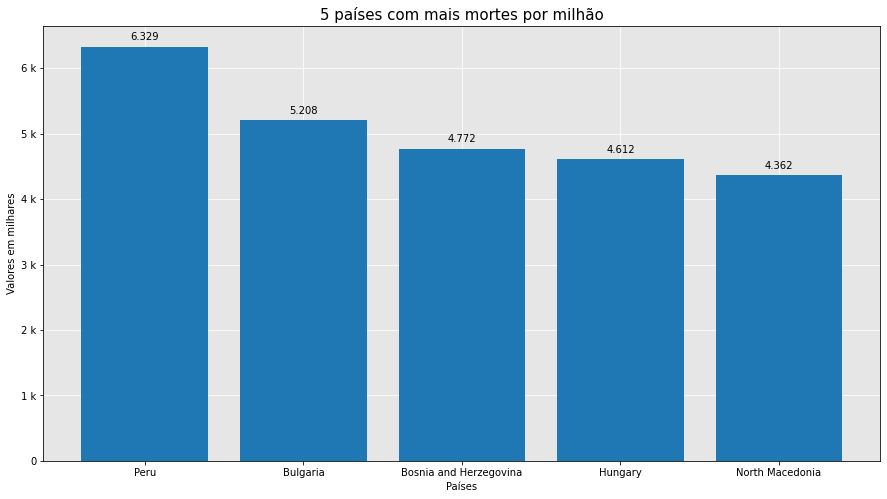

In [ ]:
df_most_deaths_per_million_without_owid = df_most_deaths_without_owid.sort_values(by='total_deaths_per_million', ascending=False)

fig ,ax_mortes = plt.subplots(figsize=(15,8));
bar_container = ax_mortes.bar(x=df_most_deaths_per_million_without_owid.iloc[:5]['location'], height=df_most_deaths_per_million_without_owid.iloc[:5]['total_deaths_per_million']);
ax_mortes.yaxis.get_major_formatter().set_scientific(False)
formatter0 = EngFormatter()
ax_mortes.yaxis.set_major_formatter(formatter0)
ax_mortes.set_xlabel('Países');
ax_mortes.set_ylabel('Valores em milhares');
ax_mortes.set_title('5 países com mais mortes por milhão', fontsize=15);
ax_mortes.set_axisbelow(True)
ax_mortes.set_facecolor('#E6E6E6')
ax_mortes.grid(color='w', linestyle='solid')
for retangulo in ax_mortes.patches:
  ax_mortes.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height() + 100,
          '{:,}'.format(int(retangulo.get_height())).replace(',','.'),
          ha = 'center',
          fontsize=10, color='black')

Os países com mais mortes por milhão até o dia 19/02/2022 foram:
* Peru com 6.274 mortes por milhão.
* Bulgária: 5.074 mortes por milhão.
* Bosnia e Herzegovina: 4.676 mortes por milhão.
* Hungria: 4.470 mortes por milhão
* Macedônia do Norte: 4.269 mortes por milhão


Abaixo criaremos um gráfico animado, com a quantidade de mortos ao longo do tempo por cada país (bar chart race).

In [ ]:
# retira os tipos com OWID
df_race_without_owid = df[~df['iso_code'].str.contains("OWID")]

# retira entradas com total_deaths nan e ordena da data mais nova para  a mais velha
df_race_without_owid = df_race_without_owid.dropna(subset=['total_deaths']).sort_values(by='date')

df_race_without_owid = df_race_without_owid.pivot(index='date', columns='location', values='total_deaths')
df_race_without_owid.head()

location,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,United States,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,Wallis and Futuna,Yemen,Zambia,Zimbabwe
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# tempo medio de criação desse gráfico é de cerca de 10 min
# criando o plot customizado
bcr.bar_chart_race(
    df=df_race_without_owid, # selecionando os dados
    filename='covid_mortes.mp4', # nomeando o arquivo
    orientation='h', # orientação do gráfico
    sort='desc', # organização 
    n_bars=10, # número de barras
    fixed_order=False, # ordem fixa
    fixed_max=True, # máximo fixo
    steps_per_period=10, # stepos por período
    interpolate_period=False, # interpolar o período
    label_bars=True, # colocar labels nas barras
    bar_size=.95, # tamanho da barra
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'}, # labels dos períodos
    period_fmt='%B %d, %Y', # formato do período
    #period_summary_func=lambda v, r: {'x': .99, 'y': .18, 's': f'Total deaths: {v.nlargest(6).sum():,.0f}', 'ha': 'right', 'size': 8, 'family': 'Courier New'}, # resumo do período
    #perpendicular_bar_func='median', # função da barra perpendicular
    period_length=200,# tamanho do período
    figsize=(5, 3), # tamanho da período
    dpi=144, 
    cmap='dark12', # esquema de cores
    title='Mortes por COVID-19 ao longo do tempo', # título
    title_size='', # tamamnho do título
    bar_label_size=7, # tamanho do label das barras
    tick_label_size=7, # tamanho do tick do label
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'}, # definindo a fonte
    scale='linear', # escala dos dados
    writer=None, # escrever no plot
    fig=None, # definir a figura
    bar_kwargs={'alpha': .7}, # kwargs
    filter_column_colors=False);  # filtrar cores das colunas

In [ ]:
#para fazer o download do arquivo
from google.colab import files
files.download("covid_mortes.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Análise Exploratória para o Brasil


![Image of Yaktocat](https://images.unsplash.com/photo-1516306580123-e6e52b1b7b5f?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1526&q=80)

O enfrentamento da COVID-19 no Brasil teve um início conturbado. Indo em contramão do mundo, inclusive de grandes países capitalista, o governo federal se utilizou da negação e perseguição da racionalidade, primeiramente negando a gravidade da doença. Posteriormente houve a recomendação de medicamentos sem eficácia comprovada, incentivo à chamada “imunidade de rebanho”, a negação de compras de doses de vacinas antecipadas e por último, ataques a eficácia e segurança das vacinas.

Nessa parte, daremos enfase aos dados de COVID-19 relacionados ao Brasil. Além de uma visão geral, tentaremos responder, de maneira, sucinta os seguintes pontos:

* O 1º caso e a 1ª morte registrada;
* Média movel de casos e mortes;
* Mortes em relação ao numero de vacinados;


In [ ]:
# cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

In [ ]:
# mostrar as 5 primeiras entradas
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
21367,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
21368,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
21369,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN
21370,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,7049.6,3.31,5.25,32.943066
21371,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,...,10.1,17.9,NaN,2.2,75.88,0.765,NaN,NaN,NaN,NaN


Vamos verificar quantas entradas nulas o dataset possui.

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print((df_brasil.isnull().sum() / df_brasil.shape[0]).sort_values(ascending=False))

icu_patients                                  1.000000
icu_patients_per_million                      1.000000
tests_per_case                                1.000000
positive_rate                                 1.000000
weekly_hosp_admissions_per_million            1.000000
handwashing_facilities                        1.000000
weekly_hosp_admissions                        1.000000
weekly_icu_admissions_per_million             1.000000
weekly_icu_admissions                         1.000000
hosp_patients_per_million                     1.000000
hosp_patients                                 1.000000
excess_mortality_cumulative_per_million       0.967611
excess_mortality                              0.967611
excess_mortality_cumulative                   0.967611
excess_mortality_cumulative_absolute          0.967611
total_boosters                                0.757085
total_boosters_per_hundred                    0.757085
new_tests_per_thousand                        0.642375
new_tests 

Na analise abaixo podemos ver que o primeiro caso de morte no brasil é registrado no dia 17 de Março de 2020.

In [ ]:
# entradas com total_deaths nulas
df_brasil[df_brasil['total_deaths'].isnull()][['date','new_cases','total_cases','new_deaths','total_deaths']]

,date,new_cases,total_cases,new_deaths,total_deaths
21367,2020-02-26,1.0,1.0,NaN,NaN
21368,2020-02-27,0.0,1.0,NaN,NaN
21369,2020-02-28,0.0,1.0,NaN,NaN
21370,2020-02-29,1.0,2.0,NaN,NaN
21371,2020-03-01,0.0,2.0,NaN,NaN
21372,2020-03-02,0.0,2.0,NaN,NaN
21373,2020-03-03,0.0,2.0,NaN,NaN
21374,2020-03-04,2.0,4.0,NaN,NaN
21375,2020-03-05,0.0,4.0,NaN,NaN
21376,2020-03-06,9.0,13.0,NaN,NaN


In [ ]:
# primeiro caso de morte no brasil
# df_brasil.loc[df_brasil['date'] == '2020-03-17'][['date','new_cases','total_cases','new_deaths','total_deaths']]
df_brasil.loc[df_brasil['total_deaths'] == df_brasil['total_deaths'].min()]['date'].min()

Timestamp('2020-03-17 00:00:00')

O primeiro caso de COVID-19 confirmado no Brasil é referente ao dia 26 de Fevereiro de 2020

In [ ]:
df_brasil.loc[df_brasil['total_cases'] == df_brasil['total_cases'].min()]['date'].min()

Timestamp('2020-02-26 00:00:00')

Nesse momento irei retirar as colunas menos importantes para nossa analise.

In [ ]:
df_brasil.drop(['icu_patients','icu_patients_per_million','tests_per_case',                                
'positive_rate','weekly_hosp_admissions_per_million','handwashing_facilities',                      
'weekly_hosp_admissions','weekly_icu_admissions_per_million','weekly_icu_admissions',
'hosp_patients_per_million','hosp_patients','excess_mortality_cumulative_per_million',
'excess_mortality','excess_mortality_cumulative','excess_mortality_cumulative_absolute'], axis=1, inplace=True)

In [ ]:
#mostrando a data mínima e máxima do dataframe do Brasil
print(f'Brasil - Data inicial dos registros: {df_brasil.date.min()}')
print(f'Brasil - Data final dos registros: {df_brasil.date.max()}')

Brasil - Data inicial dos registros: 2020-02-26 00:00:00
Brasil - Data final dos registros: 2022-03-07 00:00:00


Vamos vizualizar o grafico da média movel de casos confirmados de covid para um mesmo intervalo de tempo, analisando tambem quando foi o primeiro caso confirmado da variante Omicron.

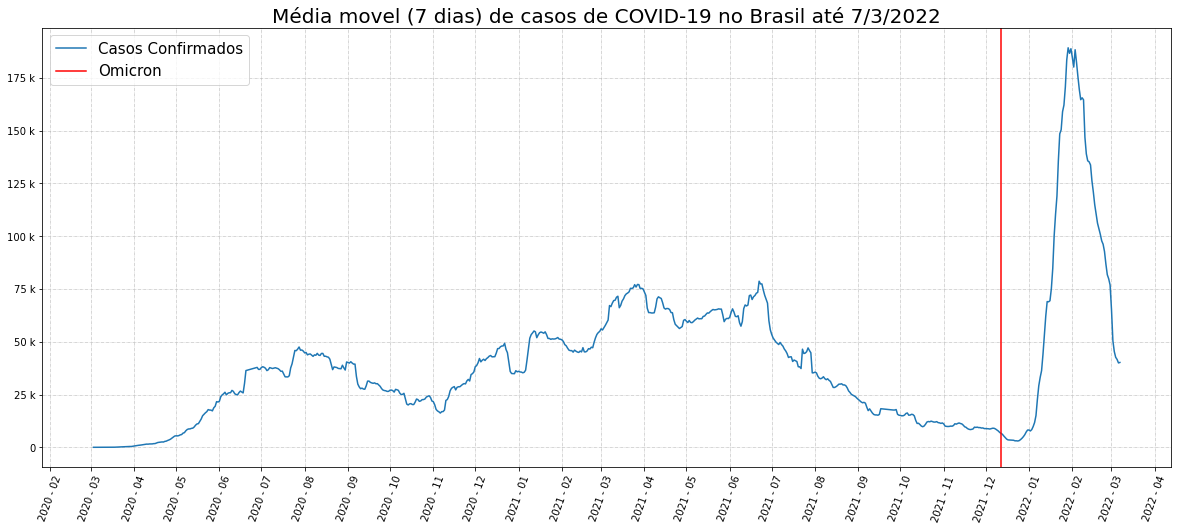

In [ ]:
from datetime import datetime

fig, ax = plt.subplots(figsize=(17, 8))

df_brasil_clean_new_cases_smoothed = df_brasil.dropna(subset=['new_cases_smoothed'])

ax.plot(df_brasil_clean_new_cases_smoothed['date'], df_brasil_clean_new_cases_smoothed['new_cases_smoothed'], label='Casos Confirmados')

# 2021-12-12, primeiro caso da variante Omicron mo Brasil
# link https://agenciabrasil.ebc.com.br/en/saude/noticia/2022-01/aparecida-de-goiania-reports-first-death-omicron-variant
# transformando strind date para DateTime
datetime_object = datetime.fromisoformat('2021-12-12')

# Desenhando linha vertical
ax.axvline(x=datetime_object, c='red', label='Omicron')

ax.yaxis.get_major_formatter().set_scientific(False)
formatter0 = EngFormatter()
ax.yaxis.set_major_formatter(formatter0)
ax.grid(linestyle = '-.', linewidth = 0.5);
ax.legend(fontsize=15);

last_date = df_brasil_clean_new_cases_smoothed['date'].max()
ax.set_title(f"Média movel (7 dias) de casos de COVID-19 no Brasil até {last_date.day}/{last_date.month}/{last_date.year}", fontsize=20);
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1));
ax.xaxis.set_major_formatter(monthsFmt);
plt.xticks(rotation=70);
plt.tight_layout(pad = 3.0);


Apos a aparição da Omicron no país, o valor de casos de COVID-19 aumentaram significativamente, isso se deve a alta taxa de contagio/transmissão dessa variante. Outras possibilidades para o aumento de novos casos estão:


*   Relaxamento ou flexibilização das quarentenas e medidas de distanciamento social.
*   As datas festivas de final de ano podem ter contribuído para o aumento de casos e mortes.

Entratanto, esse aumento expressivo não ocorre com a mortalidade.

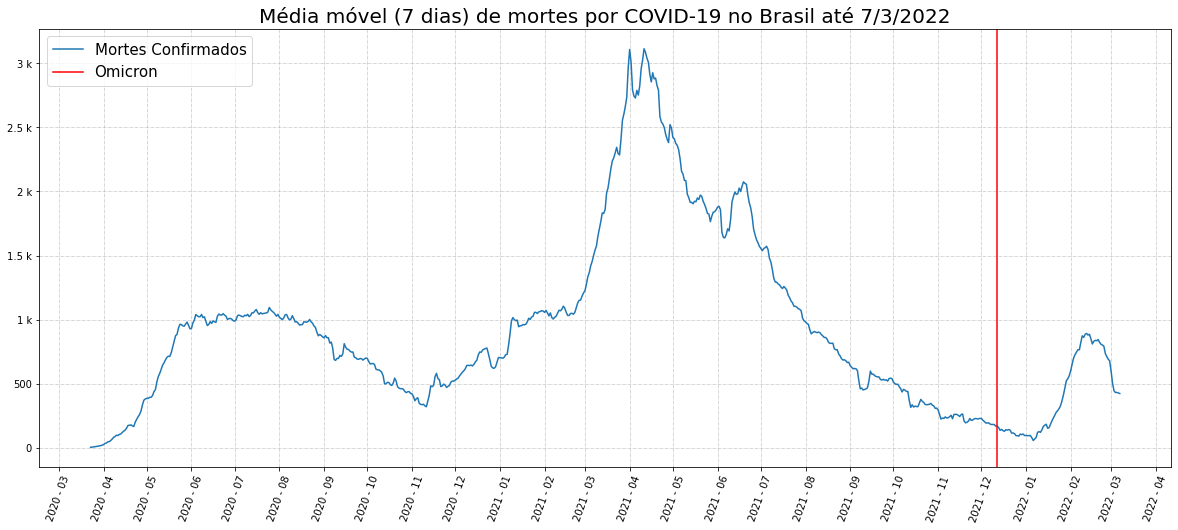

In [ ]:
fig, ax = plt.subplots(figsize=(17, 8))

df_brasil_clean_new_deaths_smoothed = df_brasil.dropna(subset=['new_deaths_smoothed'])

ax.plot(df_brasil_clean_new_deaths_smoothed['date'], df_brasil_clean_new_deaths_smoothed['new_deaths_smoothed'], label='Mortes Confirmados')

# 2021-12-12, primeiro caso da variante Omicron mo Brasil
# link https://agenciabrasil.ebc.com.br/en/saude/noticia/2022-01/aparecida-de-goiania-reports-first-death-omicron-variant
# transformando strind date para DateTime
datetime_object = datetime.fromisoformat('2021-12-12')

# Desenhando linha vertical
ax.axvline(x=datetime_object, c='red', label='Omicron')

ax.yaxis.get_major_formatter().set_scientific(False)
formatter0 = EngFormatter()
ax.yaxis.set_major_formatter(formatter0)
ax.grid(linestyle = '-.', linewidth = 0.5);
ax.legend(fontsize=15);

last_date = df_brasil_clean_new_deaths_smoothed['date'].max()
ax.set_title(f"Média móvel (7 dias) de mortes por COVID-19 no Brasil até {last_date.day}/{last_date.month}/{last_date.year}", fontsize=20);
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1));
ax.xaxis.set_major_formatter(monthsFmt);
plt.xticks(rotation=70);
plt.tight_layout(pad = 3.0);


Para entendermos melhor as causas dessa pequeno crescimento, vamos comparar o grafico anterior com o do numero de pessoas que receberam ao menos uma dose da vacina.

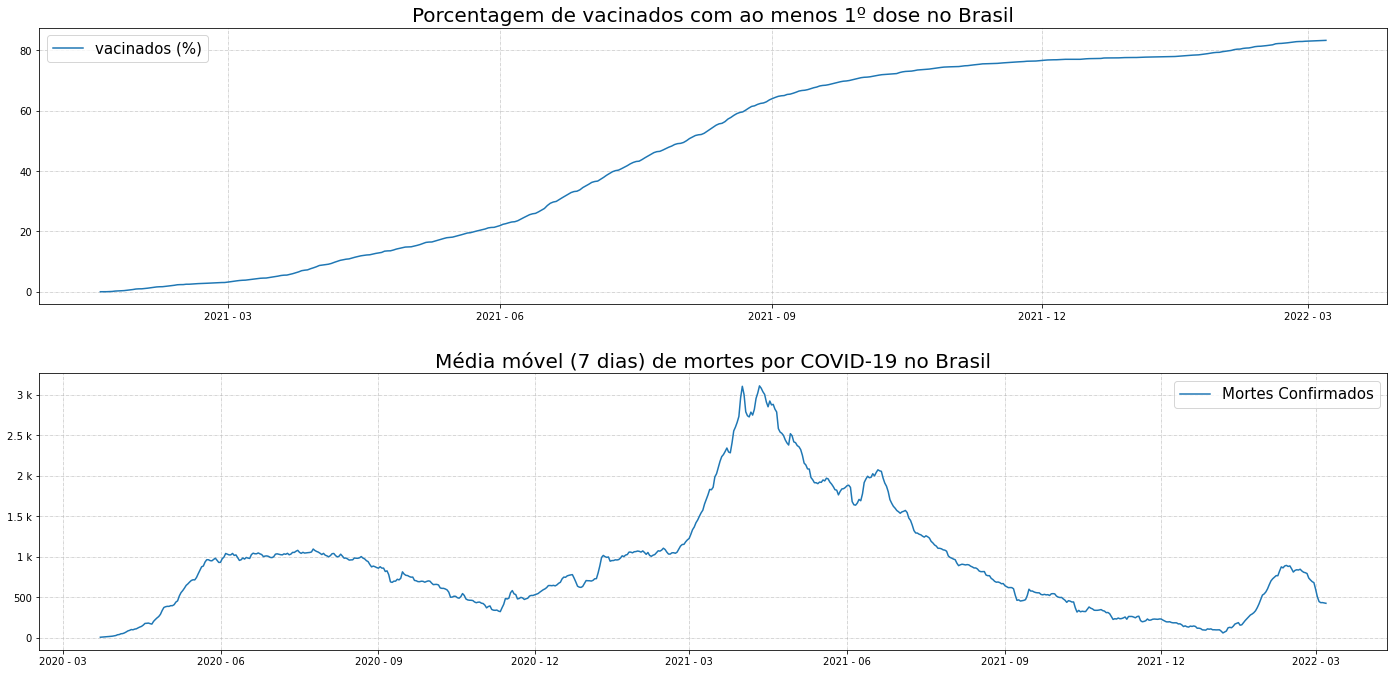

In [ ]:
fig, (ax_vacinados, ax_mortes) = plt.subplots(2, 1, figsize=(20, 10))

# ax de vacinados
df_brasil_clean_people_vaccinated_per_hundred = df_brasil.dropna(subset=['people_vaccinated_per_hundred'])
ax_vacinados.plot(df_brasil_clean_people_vaccinated_per_hundred['date'], df_brasil_clean_people_vaccinated_per_hundred['people_vaccinated_per_hundred'], label='vacinados (%)')
ax_vacinados.yaxis.get_major_formatter().set_scientific(False)
formatter0 = EngFormatter()
ax_vacinados.yaxis.set_major_formatter(formatter0)
ax_vacinados.grid(linestyle = '-.', linewidth = 0.5);
ax_vacinados.legend(fontsize=15);
ax_vacinados.set_title("Porcentagem de vacinados com ao menos 1º dose no Brasil", fontsize=20);
ax_vacinados.xaxis.set_major_locator(mdates.MonthLocator(interval=3));
ax_vacinados.xaxis.set_major_formatter(monthsFmt);
plt.tight_layout(pad = 3.0);

#  ax de mortes
df_brasil_clean_new_deaths_smoothed = df_brasil.dropna(subset=['new_deaths_smoothed'])
ax_mortes.plot(df_brasil_clean_new_deaths_smoothed['date'], df_brasil_clean_new_deaths_smoothed['new_deaths_smoothed'], label='Mortes Confirmados')
ax_mortes.yaxis.get_major_formatter().set_scientific(False)
formatter0 = EngFormatter()
ax_mortes.yaxis.set_major_formatter(formatter0)
ax_mortes.grid(linestyle = '-.', linewidth = 0.5);
ax_mortes.legend(fontsize=15);
ax_mortes.set_title("Média móvel (7 dias) de mortes por COVID-19 no Brasil", fontsize=20);
ax_mortes.xaxis.set_major_locator(mdates.MonthLocator(interval=3));
ax_mortes.xaxis.set_major_formatter(monthsFmt);
plt.tight_layout(pad = 3.0);

Uma das possiveis causas para essa diminuição gradativa no numero de mortes no Brasil, pode estar no ritmo e na quantidade de vacinações. Quando a média móvel de mortes atinge seu pico e em seguida segue em decrescimento contínuo, são os meses em que a vacinação começa a crescer em um ritmo também contínuo.

**O que escala logarítmica**:

Uma escala logarítmica é uma escala que usa o logaritmo de uma grandeza em vez da grandeza propriamente dita. 

A situação mais comum onde a escala logarítmica é benéfica é quando a amostragem de dados ou a amplitude dos valores em um gráfico é muito grande. Nesses casos, uma porção considerável de dados pode estar visualmente “achatada”, dificultando a leitura, como na situação acima.

No eixo y, a diferença entre as graduações são proporcional, não a uma adição, mas sim a uma mutiplicação. Em nosso caso, a base de graduação é da base 10, ou seja, 10x a cada diferença entre os intervalos.

Nesse caso vamos plotar dois gráficos de total de mortes e casos no Brasil, sendo um loga logarítmico e outro linear.

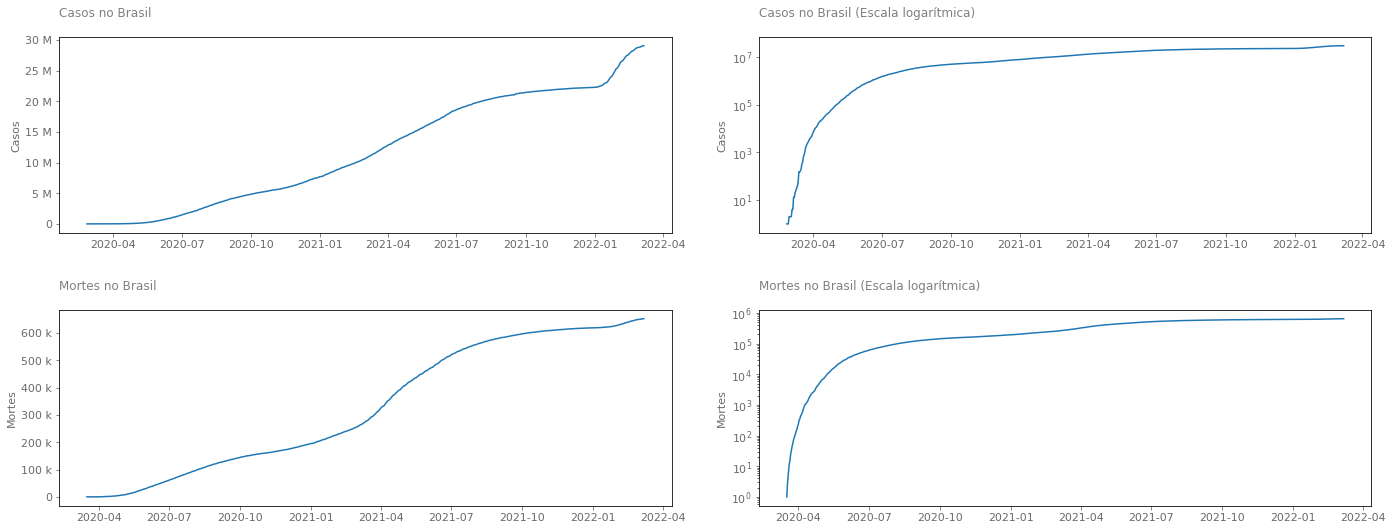

In [ ]:
fig, ((ax_vacinados, ax_log_vacinados), (ax_mortes, ax_log_mortes)) = plt.subplots(2, 2, figsize=(20, 8))

# grafico 1 - Casos no Brasil
ax_vacinados.plot(df_brasil['date'], df_brasil['total_cases'])
ax_vacinados.set_title('Casos no Brasil', color='Grey', size=12, loc='left', pad=20)
ax_vacinados.set_ylabel('Casos', size=11, color='dimgrey')
ax_vacinados.tick_params(axis='x', labelsize=11, colors='dimgrey')
ax_vacinados.tick_params(axis='y', labelsize=11, colors='dimgrey')
formatter0 = EngFormatter()
ax_vacinados.yaxis.set_major_formatter(formatter0)

# grafico 2 - Casos no Brasil (Escala logarítmica)
ax_log_vacinados.set_title('Casos no Brasil (Escala logarítmica)', color='Grey', size=12, loc='left', pad=20)
ax_log_vacinados.set_ylabel('Casos', size=11, color='dimgrey')
ax_log_vacinados.tick_params(axis='x', labelsize=11, colors='dimgrey')
ax_log_vacinados.tick_params(axis='y', labelsize=11, colors='dimgrey')
ax_log_vacinados.set_yscale('log')
ax_log_vacinados.plot(df_brasil['date'], df_brasil['total_cases'])

# grafico 3 - Mortes no Brasil
ax_mortes.set_title('Mortes no Brasil', color='Grey', size=12, loc='left', pad=20)
ax_mortes.set_ylabel('Mortes', size=11, color='dimgrey')
ax_mortes.tick_params(axis='x', labelsize=11, colors='dimgrey')
ax_mortes.tick_params(axis='y', labelsize=11, colors='dimgrey')
ax_mortes.plot(df_brasil['date'], df_brasil['total_deaths'])
formatter0 = EngFormatter()
ax_mortes.yaxis.set_major_formatter(formatter0)

# grafico 4 - Mortes no Brasil (Escala logarítmica)
ax_log_mortes.set_title('Mortes no Brasil (Escala logarítmica)', color='Grey', size=12, loc='left', pad=20)
ax_log_mortes.set_ylabel('Mortes', size=11, color='dimgrey')
ax_log_mortes.tick_params(axis='x', labelsize=11, colors='dimgrey')
ax_log_mortes.tick_params(axis='y', labelsize=11, colors='dimgrey')
ax_log_mortes.set_yscale('log')
ax_log_mortes.plot(df_brasil['date'], df_brasil['total_deaths'])

fig.tight_layout(pad=3.0)

No próximo gráfico, conseguimos ver a média móvel de novos casos no Brasil em relação ao restante do mundo.

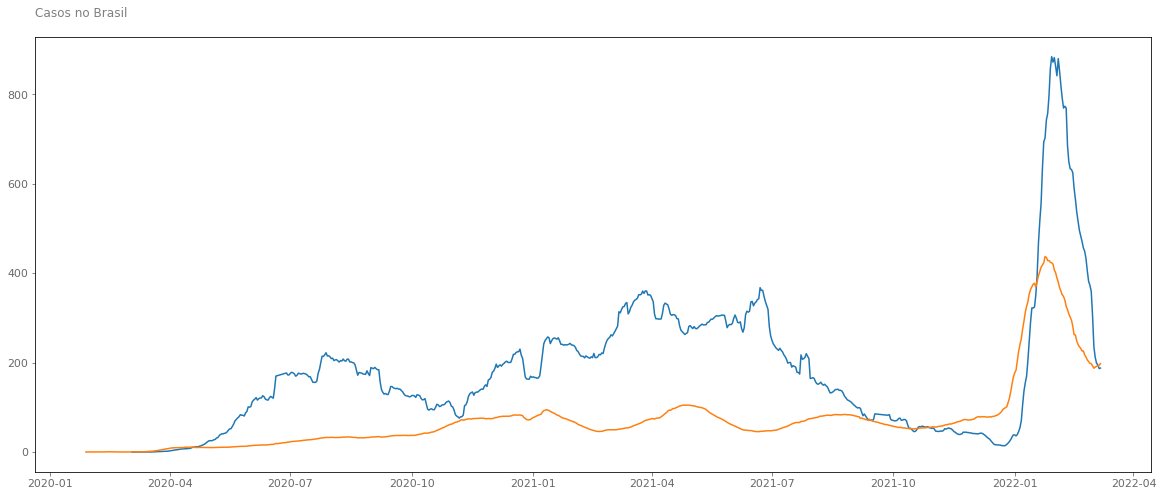

In [ ]:
fig, ax_brasil = plt.subplots(figsize=(20, 8))

world_cases = df.loc[df['location'] == 'World'][['date', 'new_cases_smoothed_per_million']]

# limpa os dados nulos para os dias que possuem 'new_cases_smoothed_per_million' nulos
df_brasil_cleaned = df_brasil.dropna(subset=['new_cases_smoothed_per_million'])

ax_brasil.plot(df_brasil_cleaned['date'], df_brasil_cleaned['new_cases_smoothed_per_million'])
ax_brasil.plot(world_cases['date'], world_cases['new_cases_smoothed_per_million'])

ax_brasil.set_title('Casos no Brasil', color='Grey', size=12, loc='left', pad=20)
ax_brasil.tick_params(axis='x', labelsize=11, colors='dimgrey')
ax_brasil.tick_params(axis='y', labelsize=11, colors='dimgrey')
formatter0 = EngFormatter()
ax_brasil.yaxis.set_major_formatter(formatter0);

## Conclusão

Nesta análise sobre o historico do avanço da COVID-19, na busca de obter *insights* tanto no ambito mundial quanto no brasileiro, utilizamos o dataset fornecido pela *Our World in Data*, com valores para o numero de casos e mortos de cada país e etc.

Devido ao contínuo contagio da COVID-19 no mundo, e principalmente no Brasil, alguns *insights* podem ficar desatualizados. Entretanto, levando em consideração a análise mais recente, no caso desse artigo até dia 7 de março de 2022, conseguimos concluir que:
  
  * Os 5 países com mais casos de COVID-19 respectivamente são: Estados Unidos, India, Brasil, França e Reino Unido.
  * Os 5 países com mais mortes por COVID-19 respectivamente são: Estados Unidos, Brazil, India, Rússia e México.
  * No Mundo, os casos de COVID-19 ultrapassaram os 400 milhões.
  * Com relação a quantidade de morte por milhão de habitantes, os 5 países com a maior quantidade foram, respectivamente: Peru, Bulgária, Bosnia e Herzegovina, Hungria e Macedônia do Norte.
  * O primeiro caso de COVID-19 confirmado no Brasil é referente ao dia 26 de Fevereiro de 2020. Já o primeiro caso de morte no Brasil é registrado no dia 17 de Março de 2020.
  * Antes da variante *Omicron*, o brasil teve os 2 maiores picos de casos entre os meses 3 e 4, e entre os meses 6 e 7 de 2021. O numero de mortes teve seu maior valor entre os meses 3 e 4.
  * Com os avanços na vacinação, o numero de mortes teve uma gradual diminuição. No mês de setembro de 2021, tivemos aproximadamente 60% da população vacinada com pelo menos 1º dose.
  * Tanto no Brasil quanto no mundo, tivemos um salto no numero de casos, devido principalmente a variante *Omicron*. O primeiro caso dessa varinate em solo brasileiro foi no dia 12 de dezembro de 2021.